In [2]:
import warnings
warnings.filterwarnings("ignore")


#**GARCH Model for  Warsaw Stock  Forecasting**
Model is used to forecast the volatility (jump) instead of actual price.

In [3]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 10.9 MB/s eta 0:00:00


In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import scipy.stats as stats

#**Warsaw Stock Exchange Top 5 Stocks Volatillity**

In [6]:
wse_tickers = ['PKN.WA', 'PKO.WA', 'PEO.WA', 'KGH.WA', 'PZU.WA']


start_date = '2010-01-01'
end_date = '2024-11-15'

In [7]:
data = yf.download(wse_tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  5 of 5 completed


**Companies Used:**
1. **PKN Orlen (PKN.WA)**:
   - **Sector**: Oil and Gas
   - **Description**: PKN Orlen is one of Central Europe's largest oil refining and petrochemical companies. It specializes in the refining of crude oil, producing gasoline, diesel, heating oils, and petrochemicals. The company operates fuel stations across Poland and other countries in Europe, including Germany and the Czech Republic. It's known for playing a pivotal role in Poland’s energy security and for its contributions to the country’s economy.

2. **PKO Bank Polski (PKO.WA)**:
   - **Sector**: Financial Services (Banking)
   - **Description**: PKO Bank Polski is Poland's largest bank in terms of assets and one of the country's oldest financial institutions. It provides a wide range of financial services, including retail banking, corporate banking, investment banking, and asset management. PKO Bank Polski is known for its strong market presence and influence within the Polish financial sector.

3. **Bank Pekao S.A. (PEO.WA)**:
   - **Sector**: Financial Services (Banking)
   - **Description**: Bank Pekao is another major Polish bank and financial services provider, second in size after PKO Bank Polski. It offers services similar to PKO, including retail and corporate banking, investment services, and asset management. The bank has a significant historical background and is known for its role in providing stability to the Polish economy.

4. **KGHM Polska Miedź (KGH.WA)**:
   - **Sector**: Mining and Metals
   - **Description**: KGHM is one of the world’s largest copper and silver mining companies. With extensive mining operations in Poland and a presence in several other countries, KGHM is a significant global player in the metals industry. It primarily extracts copper, but it also mines silver, gold, and other minerals. This company is critical for Poland’s economy as it is a major exporter and contributes substantially to the national GDP.

5. **PZU Group (PZU.WA)**:
   - **Sector**: Insurance and Financial Services
   - **Description**: PZU (Powszechny Zakład Ubezpieczeń) is Poland's largest insurance company and one of the biggest in Central and Eastern Europe. It offers a wide range of insurance products, including life, health, motor, and property insurance, as well as investment and pension fund management. PZU plays a key role in the Polish insurance market and provides financial security for a large portion of the population.



In [9]:
data.head()

Ticker,KGH.WA,PEO.WA,PKN.WA,PKO.WA,PZU.WA
Date,,,,,
2024-11-07 00:00:00+00:00,151.449997,155.600006,53.700001,60.000000,41.709999
2024-11-08 00:00:00+00:00,146.649994,155.100006,52.599998,59.580002,41.150002
2024-11-12 00:00:00+00:00,133.149994,153.600006,50.389999,58.639999,40.869999
2024-11-13 00:00:00+00:00,133.949997,150.800003,50.840000,57.299999,40.919998
2024-11-14 00:00:00+00:00,130.649994,147.600006,53.099998,59.119999,41.570000


In [10]:
returns = data.pct_change().dropna()

# Here we create an empty dictionary to store the GARCH model results for each stock
# Set up GARCH modeling for each stock

In [11]:
garch_results = {}
for ticker in wse_tickers:
    model = arch_model(returns[ticker], vol='Garch', p=1, q=1)
    garch_results[ticker] = model.fit(disp='off')
    print(f"GARCH Model fit for {ticker} complete.")

GARCH Model fit for PKN.WA complete.
GARCH Model fit for PKO.WA complete.
GARCH Model fit for PEO.WA complete.
GARCH Model fit for KGH.WA complete.
GARCH Model fit for PZU.WA complete.


The Visualization  Part For the Warsaw Stocks

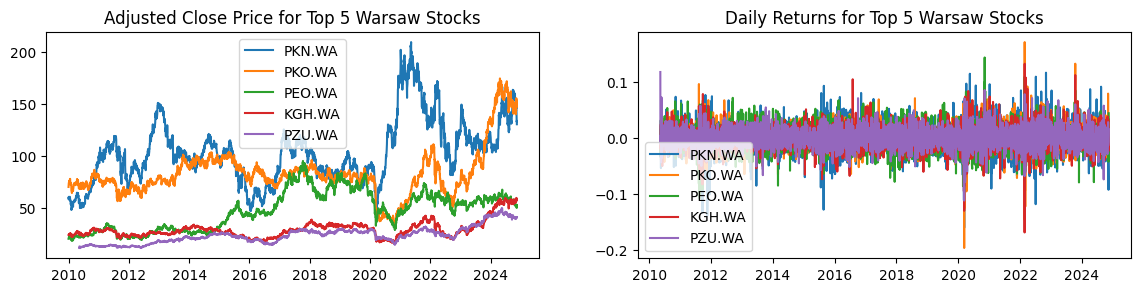

In [17]:
plt.figure(figsize=(14, 10))

# Price Plot
plt.subplot(3, 2, 1)
plt.plot(data)
plt.title("Adjusted Close Price for Top 5 Warsaw Stocks")
plt.legend(wse_tickers)
plt.subplot(3, 2, 2)
plt.plot(returns)
plt.title("Daily Returns for Top 5 Warsaw Stocks")
plt.legend(wse_tickers)


The Above We Can see That the   Warsaw Recent  Growth in terms of  income and   gdp shows how the shares are increasing in terms of it as such  we get  the desired  close price and  the returns

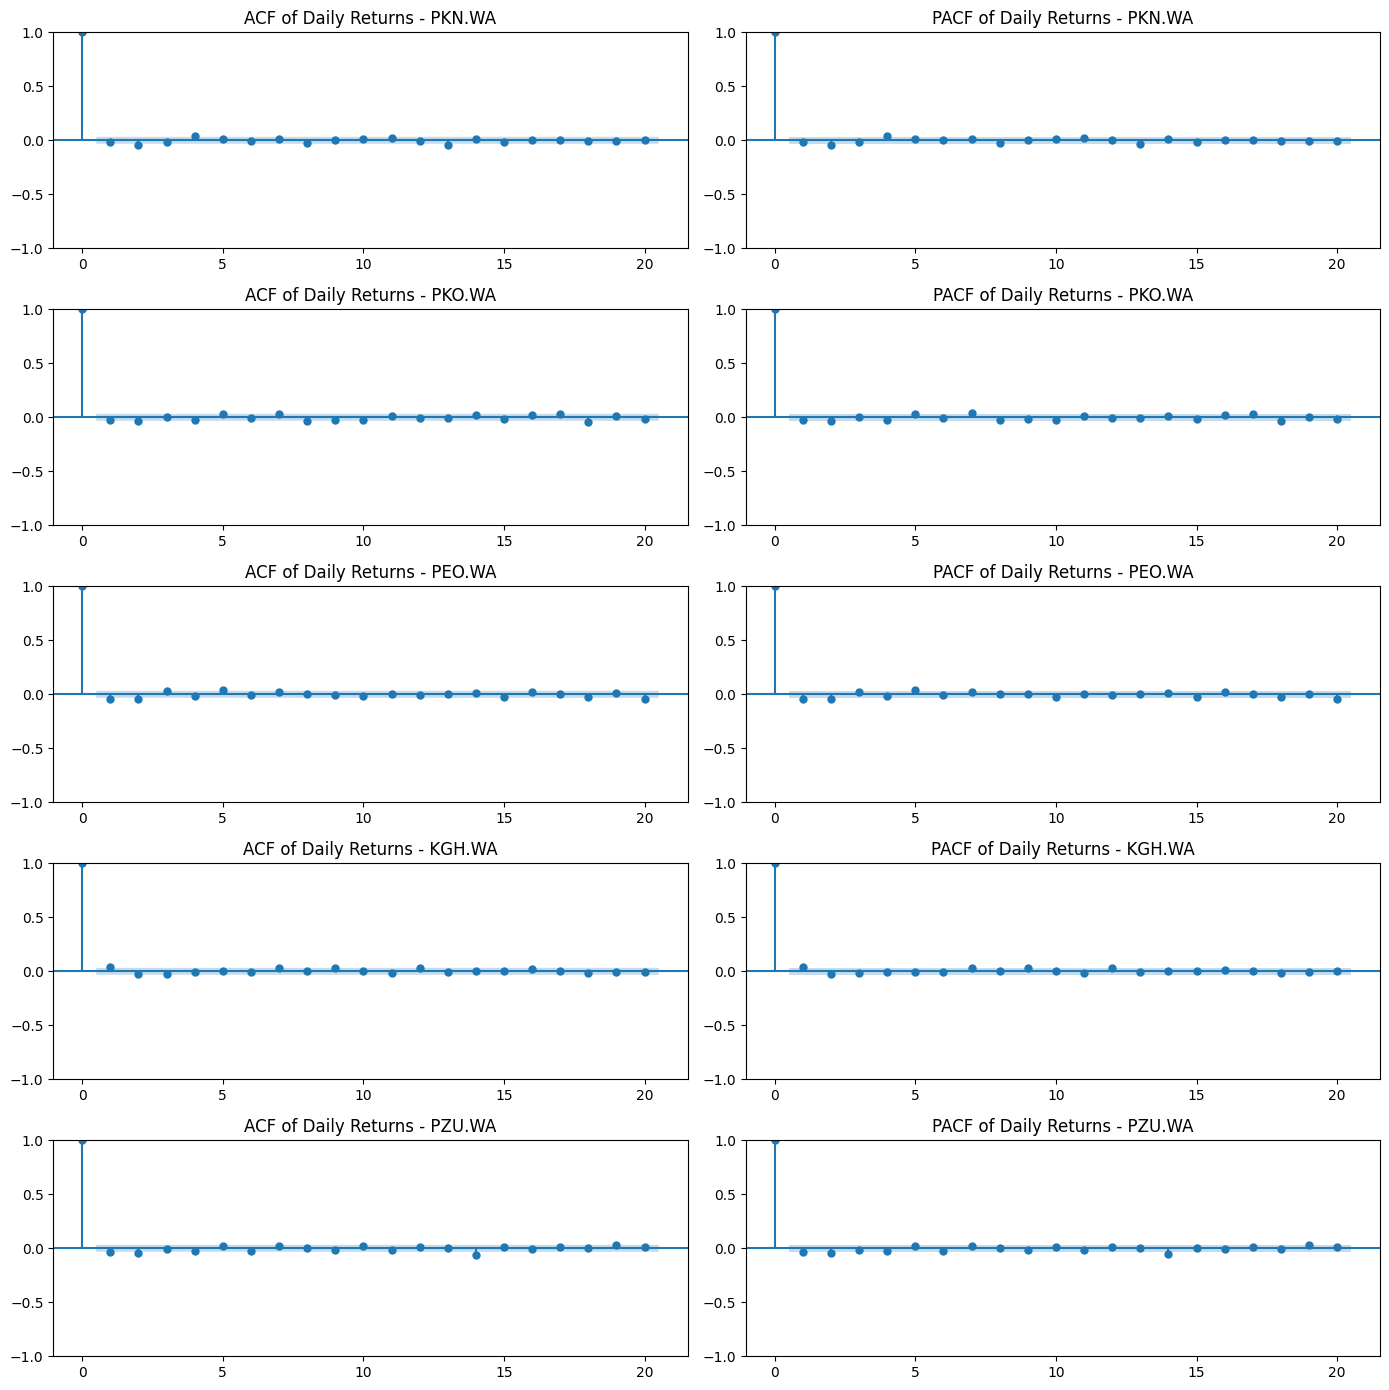

In [18]:
plt.figure(figsize=(14, 14))

for i, ticker in enumerate(wse_tickers):
    # ACF Plot
    plt.subplot(5, 2, 2 * i + 1)
    plot_acf(returns[ticker], ax=plt.gca(), lags=20)
    plt.title(f"ACF of Daily Returns - {ticker}")

    # PACF Plot
    plt.subplot(5, 2, 2 * i + 2)
    plot_pacf(returns[ticker], ax=plt.gca(), lags=20)
    plt.title(f"PACF of Daily Returns - {ticker}")

plt.tight_layout()
plt.show()


the above we can se a  basic  garch model  with 1 and 1  would work to get the desired  results

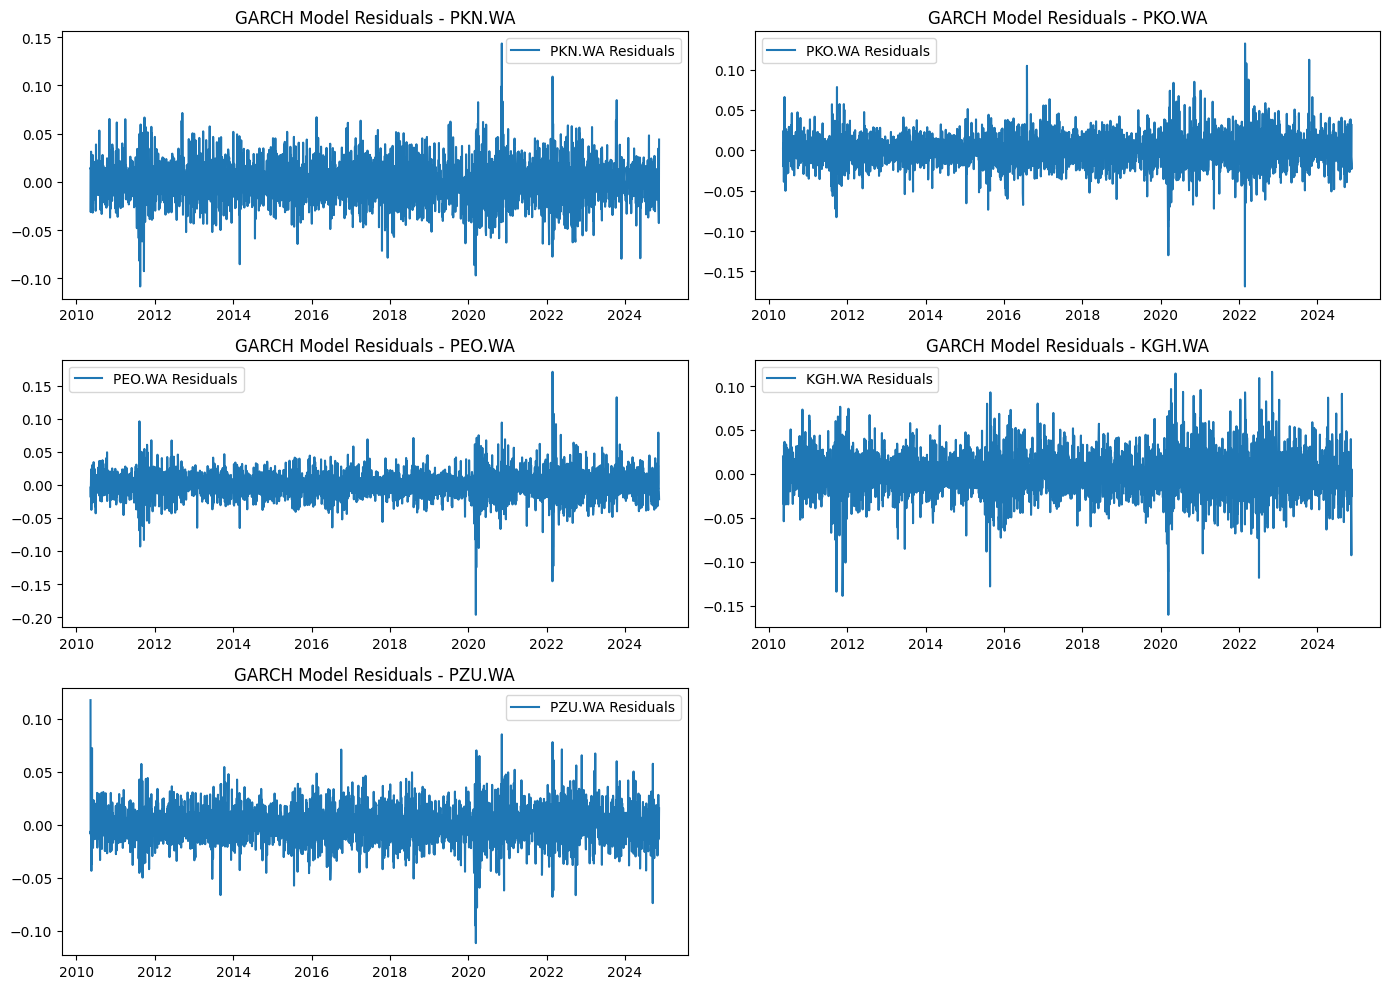

In [23]:
plt.figure(figsize=(14, 10))
for i, ticker in enumerate(wse_tickers):
    plt.subplot(3, 2, i+1)
    residuals = garch_results[ticker].resid
    plt.plot(residuals, label=f'{ticker} Residuals')
    plt.title(f'GARCH Model Residuals - {ticker}')
    plt.legend()

plt.tight_layout()
plt.show()

the  above provides the  residual  difference between the actual and predicted

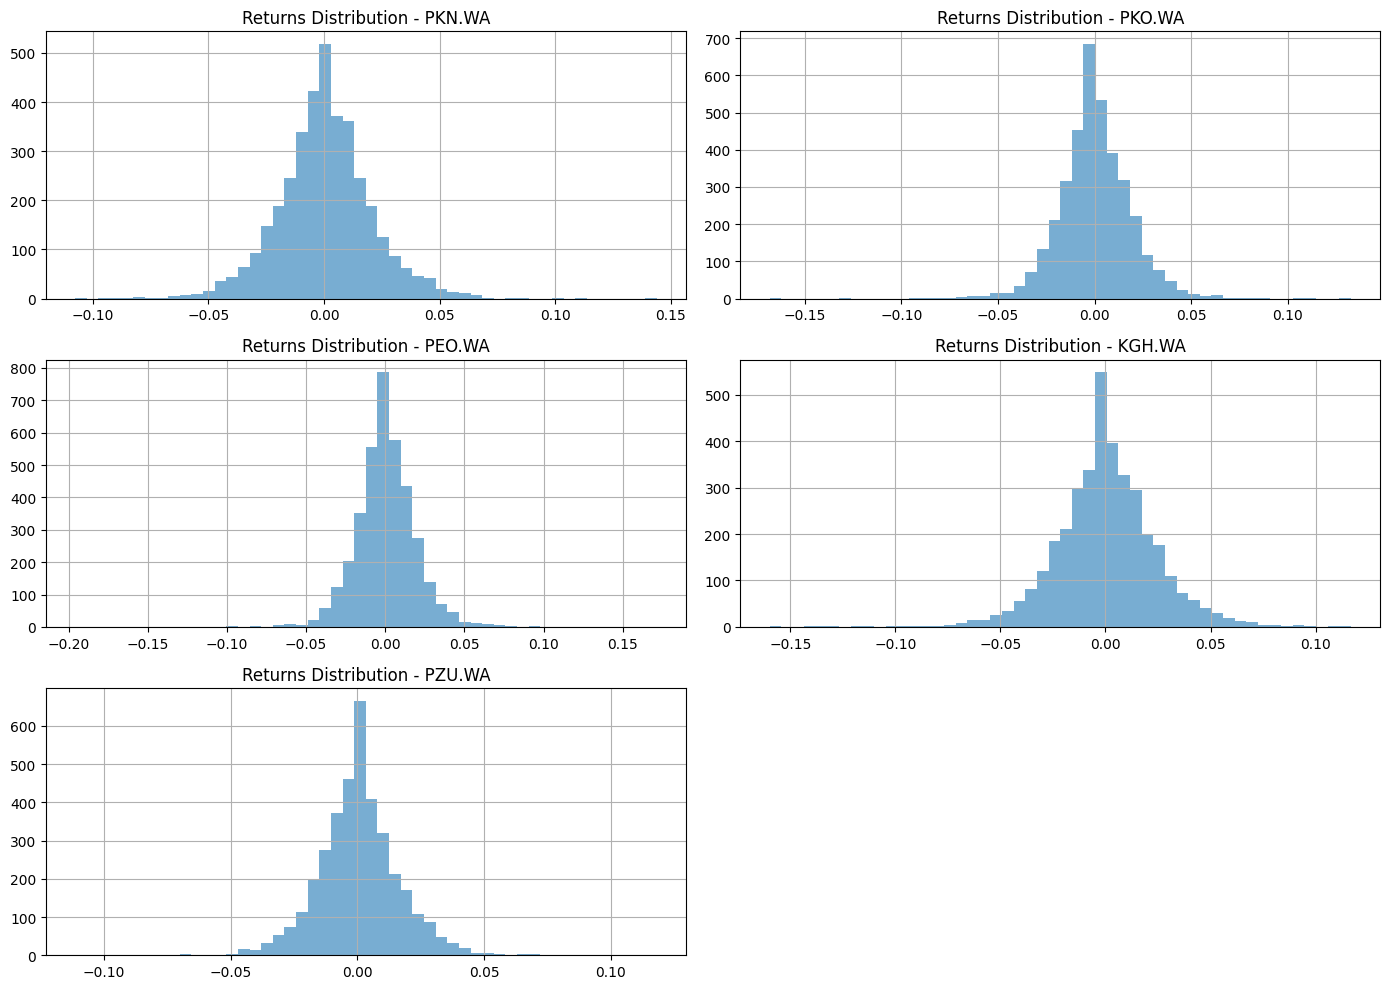

In [24]:
plt.figure(figsize=(14, 10))
for i, ticker in enumerate(wse_tickers):
    plt.subplot(3, 2, i+1)
    returns[ticker].hist(bins=50, alpha=0.6)
    plt.title(f'Returns Distribution - {ticker}')

plt.tight_layout()
plt.show()

the distribution of the volatillity

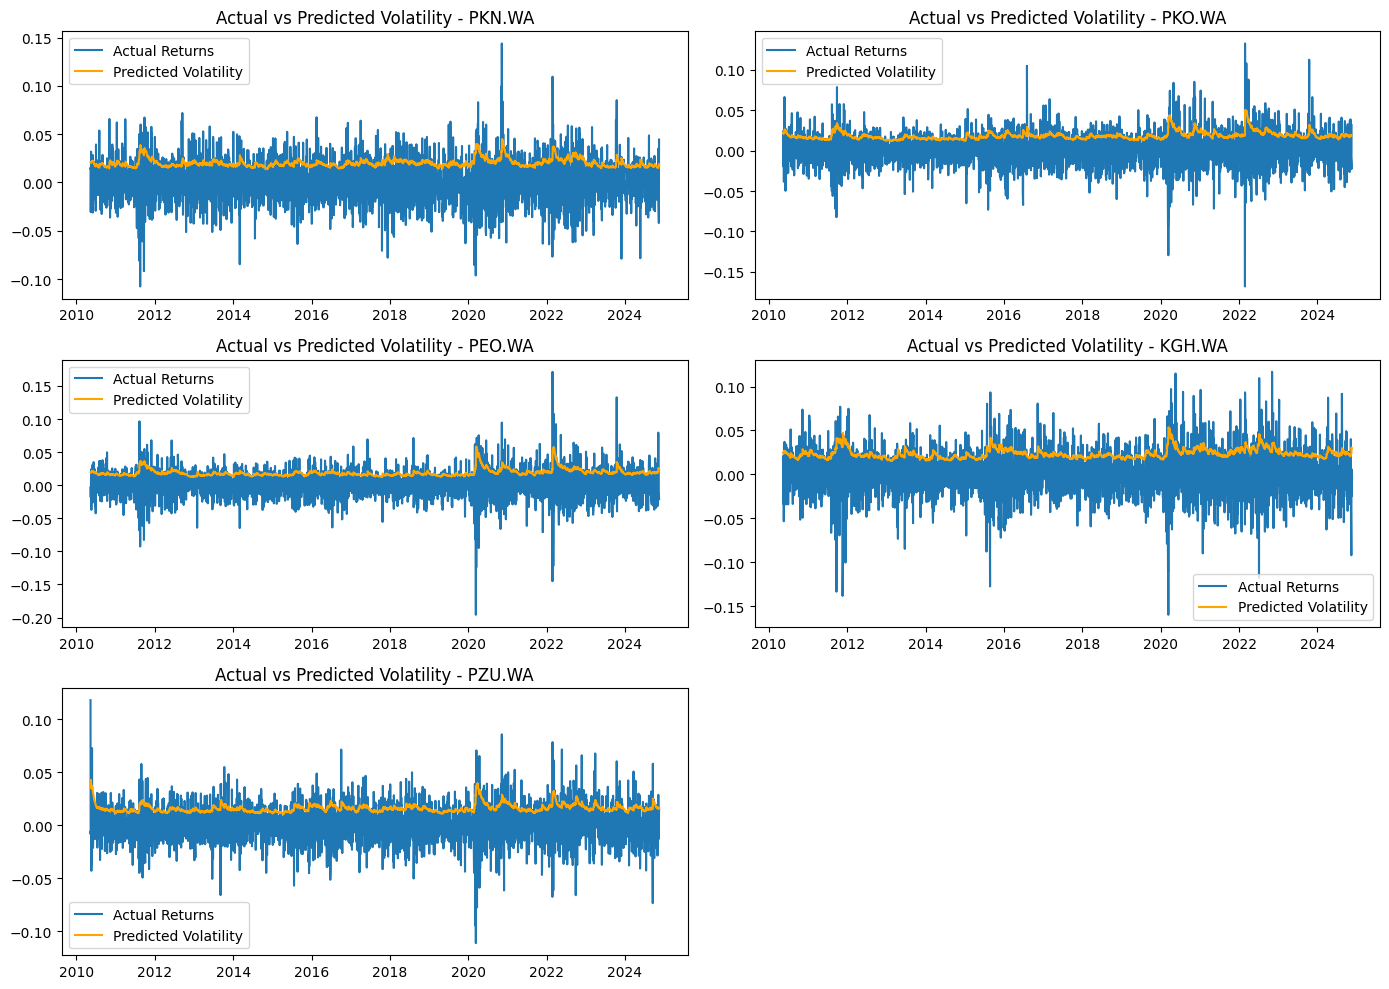

In [19]:
plt.figure(figsize=(14, 10))
for i, ticker in enumerate(wse_tickers):
    plt.subplot(3, 2, i+1)
    garch_volatility = garch_results[ticker].conditional_volatility
    plt.plot(returns[ticker], label='Actual Returns')
    plt.plot(garch_volatility, color='orange', label='Predicted Volatility')
    plt.title(f'Actual vs Predicted Volatility - {ticker}')
    plt.legend()

plt.tight_layout()
plt.show()

the  above provides the  plot which is  a  comprehensive difference between the  predicted volatillity and the actual returns

In [22]:
for ticker in wse_tickers:
    print(f"\n=== Actual and Predicted Volatility for {ticker} ===")
    actual_returns = returns[ticker]
    predicted_volatility = garch_results[ticker].conditional_volatility
    combined_df = pd.DataFrame({
        'Actual Returns': actual_returns,
        'Predicted Volatility': predicted_volatility
    })
    print(combined_df)


=== Actual and Predicted Volatility for PKN.WA ===
                           Actual Returns  Predicted Volatility
Date                                                           
2010-05-12 00:00:00+00:00        0.014608              0.020540
2010-05-13 00:00:00+00:00        0.015445              0.020264
2010-05-14 00:00:00+00:00       -0.030678              0.020034
2010-05-17 00:00:00+00:00        0.031915              0.020752
2010-05-18 00:00:00+00:00        0.014949              0.021400
...                                   ...                   ...
2024-11-07 00:00:00+00:00        0.035081              0.014894
2024-11-08 00:00:00+00:00       -0.020484              0.016559
2024-11-12 00:00:00+00:00       -0.042015              0.016902
2024-11-13 00:00:00+00:00        0.008930              0.019105
2024-11-14 00:00:00+00:00        0.044453              0.018745

[3731 rows x 2 columns]

=== Actual and Predicted Volatility for PKO.WA ===
                           Actual Retur

the  tables provides the  difference between the actual and predicted volatility

**Conclusion:**


The comprehensive analysis of Poland's top five Warsaw Stock Exchange companies through financial time-series data, volatility modeling, and statistical assessment provides valuable insights into their market dynamics and risk profiles. By leveraging daily returns and applying GARCH modeling, we observe how each company's stock experiences unique volatility patterns and trends. This modeling helps understand the underlying market behavior and potential risks, especially for firms in sectors like oil (PKN Orlen) and metals (KGHM Polska Miedź), which are often subject to global economic shifts.

In summary, the analysis underscores the financial stability of established entities like PKO Bank Polski and PZU Group, while also emphasizing the volatility associated with commodity-dependent firms like PKN Orlen and KGHM. These insights can guide investors, portfolio managers, and policymakers in making informed decisions, considering both the strengths and potential risks of these key players within the Polish and European markets.